In [7]:
#communities (SIRD) for checking the spread of the virus and the amount of death it causes based on the activity of a community 
#(older inactive, younger active group) and starting the vaccinating when one percentage of the population is ill.
import numpy as np

L = 2 
w = [0.5, 0.5]
A = [[6, 0.2],
     [0.2, 0.1]]

# time and steps
T = 10
dt = 0.001
nsteps = round(T/dt)
v_S_1 = [[0, 0] for t in range(nsteps+1)]
v_I_1 = [[0, 0] for t in range(nsteps+1)]
v_R_1 = [[0, 0] for t in range(nsteps+1)]
v_D_1 = [[0, 0] for t in range(nsteps+1)]
v_V_1 = [[0, 0] for t in range(nsteps+1)]
# initial condition
#Egymás alatti értékeknek 1-et kell adni
v_S_1[0] = [0.999999, 1]
v_I_1[0] = [0.000001, 0]

# model parameters
beta = 3     # fertőzési ráta, rate of getting infected by the virus
gamma = 1    # gyógyulási ráta, recovering rate
delta = 1    # oltási sebesség, vakcina mennyisége, speed of the vaccination, amount of the vaccine
epszilon = 1 # Milyen gyorsan alakul ki a védettség az oltástól, How fast can the population get immunity against the virus because of the vaccine.

mu = [0.000001, 0.01] # Halálozási ráta az egyes közösségekben, Death rate in the communities. A lower one for the younger generation, first population. 
                       # A higher one for the older, more harmful generation, second population.
cnt = 0;
for t in range(nsteps):
    for l in range(L): 
         if v_I_1[t][l] < 0.01 and cnt == 0:
             v_S_1[t+1][l] = v_S_1[t][l] - dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L))
             v_I_1[t+1][l] = v_I_1[t][l] + dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L)) - gamma*v_I_1[t][l]*dt
             v_R_1[t+1][l] = v_R_1[t][l] + gamma*v_I_1[t][l]*dt

         else: 
             cnt = 1;
             if v_S_1[t][l] <= 0.00000000001: # We are vaccinating the population until we have an amount of people to vaccinate, after that the process will 
                                 # obviously stop.
                 delta = 0
            
             v_S_1[t+1][l] = v_S_1[t][l] - dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L)) - dt*delta*v_S_1[t][l]
             v_I_1[t+1][l] = v_I_1[t][l] + dt*beta*v_S_1[t][l]*sum(A[k][l]*w[k]*v_I_1[t][k] for k in range(L)) - gamma*v_I_1[t][l]*dt
             v_V_1[t+1][l] = v_V_1[t][l] + dt*delta*v_S_1[t][l] - dt*epszilon*v_V_1[t][l]
             v_R_1[t+1][l] = v_R_1[t][l] + dt*(1 - mu[l])*gamma*v_I_1[t][l] + dt*epszilon*v_V_1[t][l]
             v_D_1[t+1][l] = v_D_1[t][l] + dt*mu[l]*v_I_1[t][l]


Total amount of deaths in the older community ...
started from 1% infection rate  0.041 %

Total amount of infections in the older comminity: 
started from 1% infection rate  4.128573787091931  %

Maximum amount of infected people at the same time in the older community: 
older community's amount started from 1% infection rate 1.876944350429947 %

Length of time when v_I(t)>t: 
older community's time when v_I_1(t)>t:  0.0


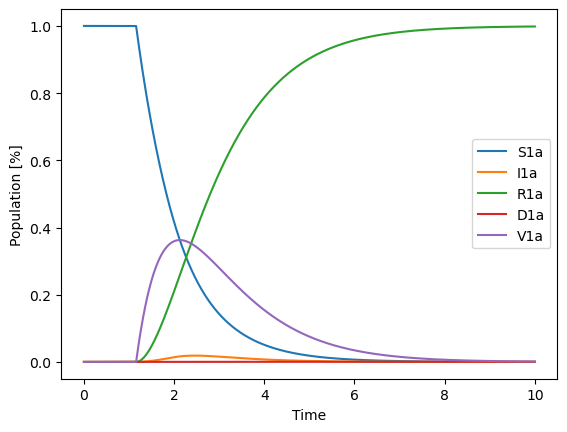

In [9]:
#Diagrams for communities with D
import matplotlib.pyplot as plt
# We generate data for the diagrams about the older (second) and the younger (first) community too
v_S_1_a = [v_S_1[t][1] for t in range(nsteps+1)]
v_I_1_a = [v_I_1[t][1] for t in range(nsteps+1)]
v_R_1_a = [v_R_1[t][1] for t in range(nsteps+1)]
v_D_1_a = [v_D_1[t][1] for t in range(nsteps+1)]
v_V_1_a = [v_V_1[t][1] for t in range(nsteps+1)]

v_S_1data = [0, 0]
v_I_1data = [0, 0]
v_R_1data = [0, 0]
v_D_1data = [0, 0]
v_V_1data = [0, 0]

for i in range(L):
    v_S_1data[i] = [v_S_1[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_1data[i] = [v_I_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_R_1data[i] = [v_R_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_D_1data[i] = [v_D_1[t][i] for t in range(nsteps+1)]
    
for i in range(L):
    v_V_1data[i] = [v_V_1[t][i] for t in range(nsteps+1)]

# Put on diagram how the flow of the pandemic goes in the older community when we vaccinate the older community
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_1data[1],label='S1a') 
plt.plot(trange,v_I_1data[1],label='I1a') 
plt.plot(trange,v_R_1data[1],label='R1a') 
plt.plot(trange,v_D_1data[1],label='D1a') 
plt.plot(trange,v_V_1data[1],label='V1a')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/13_SIR_D_vaccinate after 1 percentage_communities_.png', bbox_inches='tight') #Ábra mentése

#################################### Adatok kinyerése az egyes esetekből ######################
# Adatok kinyerése az egyes esetekből
print('Total amount of deaths in the older community ...')
print('started from 1% infection rate ', format(v_D_1[nsteps][1]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected_1 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        infected_1[j] += (v_I_1[i][j]*dt)
    
print('\nTotal amount of infections in the older comminity: ')
print("started from 1% infection rate ", infected_1[1]*100, " %")

#Maximális megbetegedések száma egyszerre
max_v_I_1 = [0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I_1[i][j] > max_v_I_1[j]):
            max_v_I_1[j] = v_I_1[i][j]
    
print('\nMaximum amount of infected people at the same time in the older community: ')
print("older community's amount started from 1% infection rate", max_v_I_1[1]*100, "%")

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime_1 = [0.000, 0.000]; overloadedtime_2 = [0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I_1[i][j] > q):
            overloadedtime_1[j] += dt

print('\nLength of time when v_I(t)>t: ')
print("older community's time when v_I_1(t)>t: ", overloadedtime_1[1])